In [1]:
import os
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

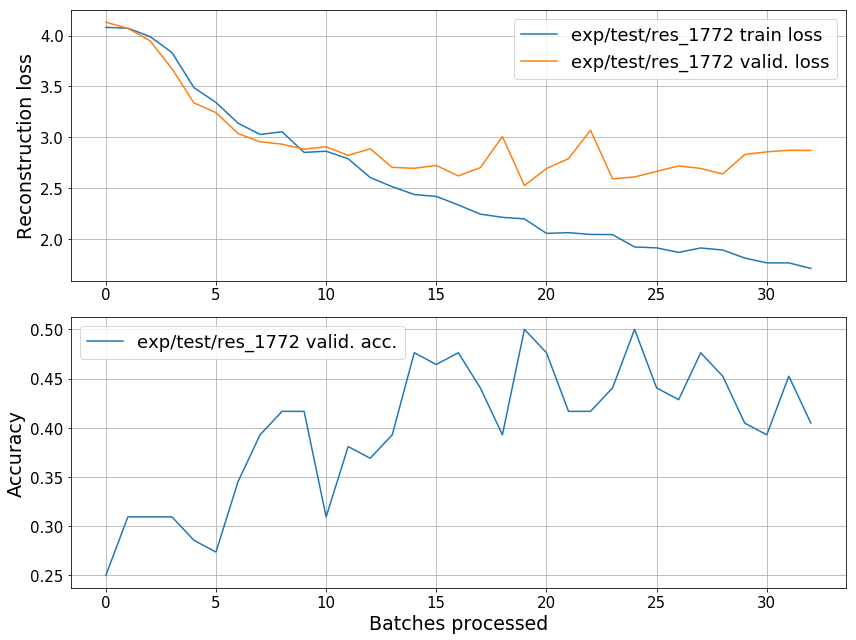

In [11]:
# Folders: indices
which_models = {'exp/test/res': [1772]}

tick_size = 15
title_size = 20
legend_size = 18
axis_label_size = 19
marker_size = 10

fig, axs = plt.subplots(2,1, figsize=(12,9))

for folder in which_models:
    for idx in which_models[folder]:
        with open(os.path.join(folder, f'{idx}.json')) as fp:
            x = json.load(fp)
            train = x['losses']['train_loss']
            val = x['losses']['val_loss']
            acc = x['losses']['val_acc']
            batch_size = x['batch_size']
        # Adjust incorrect normalization in train_test
        train = [x * batch_size * 672 / (672 - 672 % batch_size) for x in train]
        val = [x * 84 for x in val]
        axs[0].plot(train, label=f'{folder}_{idx} train loss')
        axs[0].plot(val, label=f'{folder}_{idx} valid. loss')
        axs[1].plot(acc, label=f'{folder}_{idx} valid. acc.')
    
axs[0].set_ylabel('Reconstruction loss', fontsize=axis_label_size)
axs[1].set_ylabel('Accuracy', fontsize=axis_label_size)

axs[1].set_xlabel('Batches processed', fontsize=axis_label_size)
        
for ax in axs:
    ax.grid()
    ax.legend(fontsize=legend_size)
    ax.tick_params(axis='both', labelsize=tick_size)

plt.tight_layout()